In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")

In [3]:
print(df.shape)
print(df.info())
df.head()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(["CustomerID"] , axis = 1,inplace = True)

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


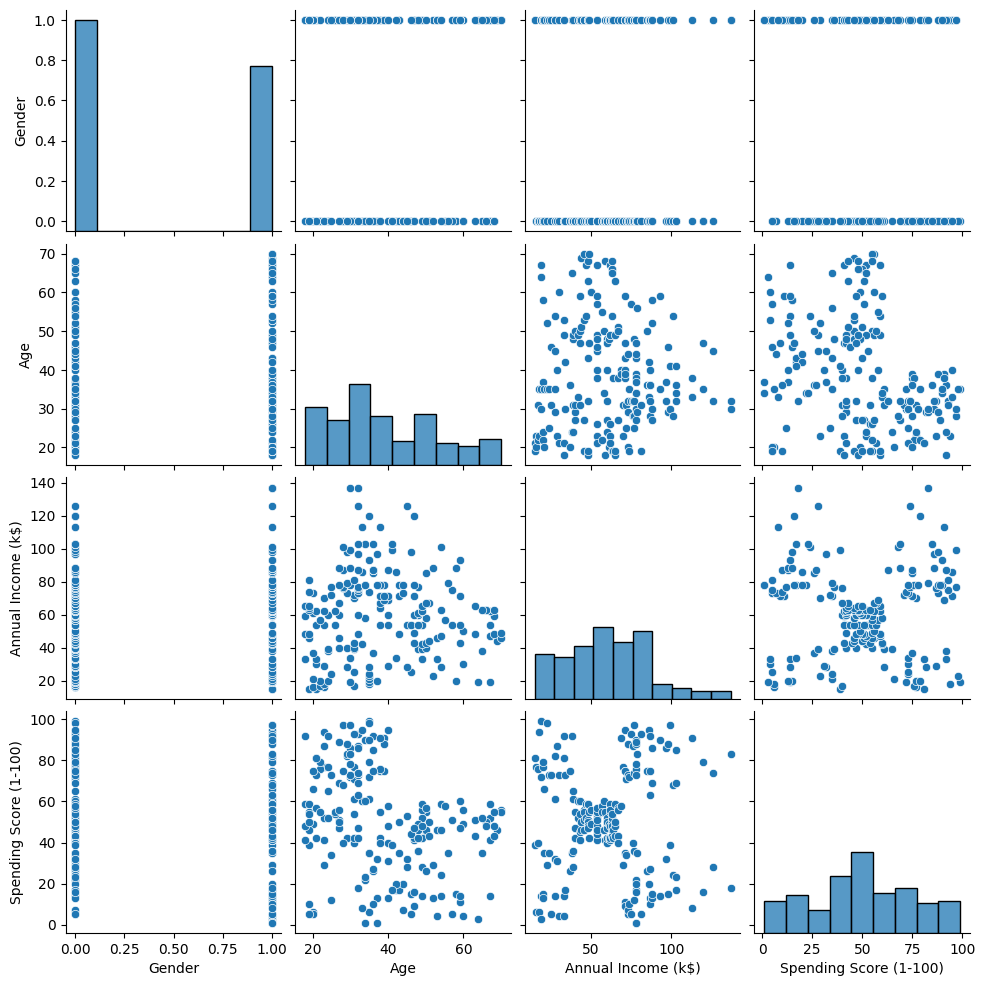

In [7]:
sns.pairplot(df)

**as we can see the 2 visual clustering features are ("Spending Score" and "Annual Income")
    comes after them ("Spending Score" and "Age")**

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [9]:
scaled_features[0]

array([ 1.12815215, -1.42456879, -1.73899919, -0.43480148])

In [10]:
#first Clustering Customers spending based on annaul income
K_score_income = KMeans(5)
#there is no need for any method to determine number of clusters as its visual that about 5 clusters 
K_score_income.fit(scaled_features[:,(3,2)])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [11]:
K_score_income.cluster_centers_

array([[-1.13696536, -1.30751869],
       [-1.28443907,  1.05500302],
       [ 1.23950275,  0.99158305],
       [-0.02645617, -0.20091257],
       [ 1.13217788, -1.32954532]])

In [12]:
df["score_income_cluster"] = K_score_income.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),score_income_cluster
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0


[Text(0.5, 1.0, 'Cluster Customers spending based on annaul income')]

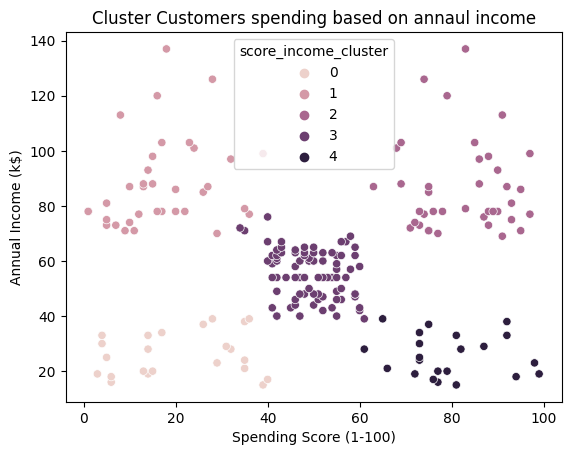

In [13]:
(sns.scatterplot(x = "Spending Score (1-100)", y = "Annual Income (k$)", hue = "score_income_cluster", data = df)
.set(title = "Cluster Customers spending based on annaul income"))


In [14]:
#Second Cluster customers spending based on Age
#as we cant determine exactly number of clusters. using silhouette coefficient method to help determine it
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features[:,(3,1)])
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

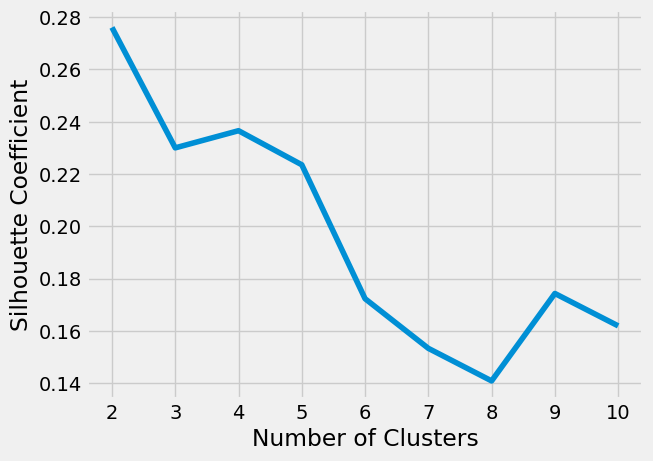

In [15]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [16]:
#as we can see 2 cluster is best way wo split data
K_score_income = KMeans(2)
#there is no need for any method to determine number of clusters as its visual that about 5 clusters 
K_score_income.fit(scaled_features[:,(3,1)])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [17]:
K_score_income.cluster_centers_

array([[-0.69939115,  0.70892251],
       [ 0.74265245, -0.75277339]])

In [18]:
df["Score_Age_cluster"] = K_score_income.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),score_income_cluster,Score_Age_cluster
0,1,19,15,39,0,1
1,1,21,15,81,4,1
2,0,20,16,6,0,0
3,0,23,16,77,4,1
4,0,31,17,40,0,1


[Text(0.5, 1.0, 'Cluster Customers spending based on Age')]

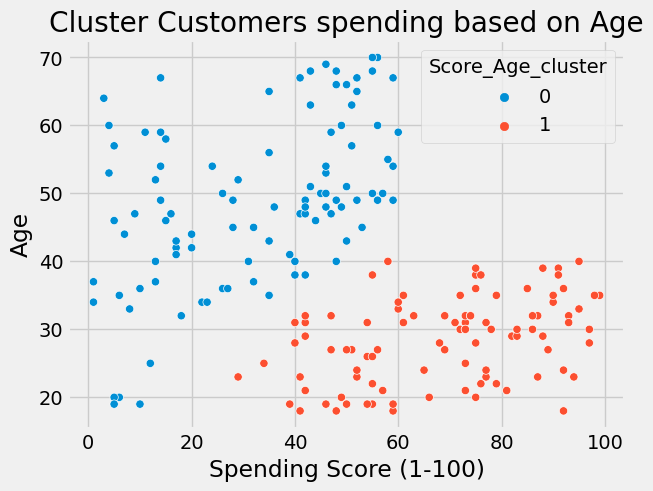

In [19]:
(sns.scatterplot(x = "Spending Score (1-100)", y = "Age", hue = "Score_Age_cluster", data = df)
.set(title = "Cluster Customers spending based on Age"))